In [20]:
import csv
import math
import pandas as pd
from scipy.stats import poisson
from scipy.stats import laplace
from scipy.stats import gennorm
from diffprivlib.mechanisms import Laplace
import matplotlib.pyplot as plt

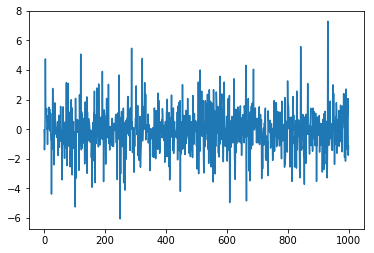

In [11]:
poiss = poisson.rvs(40, size=1000)
norm = gennorm.rvs(.5, size=1000)
laplace = laplace.rvs(size=1000)
def tohisto(data):
    histod = []
    for i in range(math.ceil(max(data))):
        histod.append(0)
        for x in data:
            if i == x:
                histod[i] = histod[i] + 1
    return histod

def is_int(num):
    return str(num).replace('.','') == str(num)

plt.plot(laplace)

In [92]:
df = pd.read_csv('./Sample Data/R01E01D01.csv')
print(df.columns)
df.dtypes


Index(['ID', 'Form', '1st reduction', '2nd reduction', 'trial', 'duration',
       '3D deviation', 'XY deviation', 'XY directed', 'Z deviation',
       'Z directed', 'Z std deviation '],
      dtype='object')


ID                    int64
Form                 object
1st reduction        object
2nd reduction        object
trial                 int64
duration            float64
3D deviation        float64
XY deviation        float64
XY directed         float64
Z deviation         float64
Z directed          float64
Z std deviation     float64
dtype: object

In [93]:
print(df['duration'].mean())
def privatise(column):
    laplace = Laplace()
    laplace.set_epsilon(1)
    laplace.set_sensitivity(300)
    
    df[column] = df[column].apply(laplace.randomise)
privatise('duration')
print(df['duration'].mean())
print(df)

8919.006913442074
8930.73209842909
      ID    Form 1st reduction 2nd reduction  trial      duration  \
0      1  circle       virtual          line      1   6435.265366   
1      1  circle       virtual          line      2   4435.767231   
2      1  circle       virtual          line      3   6999.013479   
3      1  circle       virtual          line      4   5167.486744   
4      1  circle       virtual          line      5   4229.347142   
5      1  square       virtual          line      1   5141.555862   
6      1  square       virtual          line      2   6551.973422   
7      1  square       virtual          line      3   6452.030938   
8      1  square       virtual          line      4   9248.450214   
9      1  square       virtual          line      5   6918.982311   
10     1  circle       virtual       nothing      1   5901.402296   
11     1  circle       virtual       nothing      2   4508.499172   
12     1  circle       virtual       nothing      3   3957.197525   